In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Trabalhando com Vetores

In [62]:
# Plot the vectors given
def plot_vectors(P, V, my_color, my_scale):
    for p, v, c, s in zip(P, V, my_color, my_scale):
        plt.quiver(p[0], p[1], v[0], v[1], angles='xy', scale_units='xy', color=c, scale=s)
    plt.xlim(-0.5, 2)
    plt.ylim(-0.5, 2)
    plt.grid(color='gray', linestyle='dashed', linewidth=0.5)
    plt.show()

## Criando um vetor

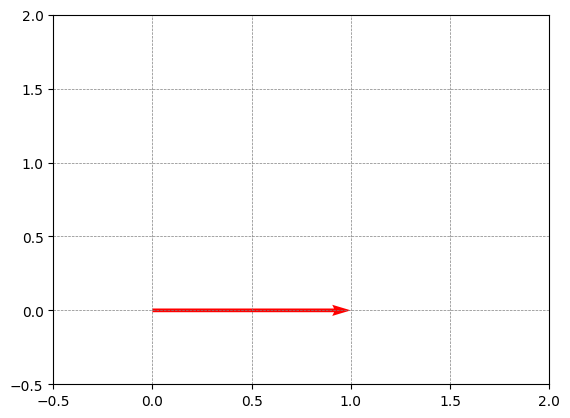

In [63]:
p1 = np.array([0, 0]) #Origem
v1 = np.array([1, 0]) #Direção

P = [p1]
V = [v1]
my_color = ['r']
my_scale = [1]

plot_vectors(P, V, my_color, my_scale)

## Somando vetores

Interpretação: Obtém um vetor entre V1 e V2.

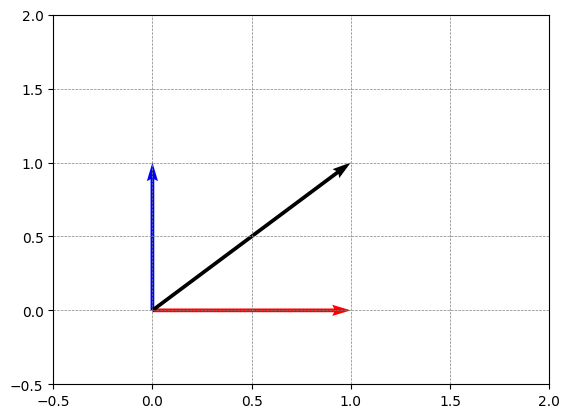

In [64]:
# Definindo os vetores
p1 = np.array([0, 0]) #Origem
v1 = np.array([1, 0]) #Direção

p2 = np.array([0, 0]) #Origem
v2 = np.array([0, 1]) #Direção

# Somando os vetores
p3 = np.add(p1, p2)
v3 = np.add(v1, v2)


P = [p1, p2, p3]
V = [v1, v2, v3]
my_color = ['r', 'b', 'k']
my_scale = [1, 1, 1]

plot_vectors(P, V, my_color, my_scale)

## Multiplicando Vetor por um Escalar

Interpretação: Aumenta o tamanho do vetor.

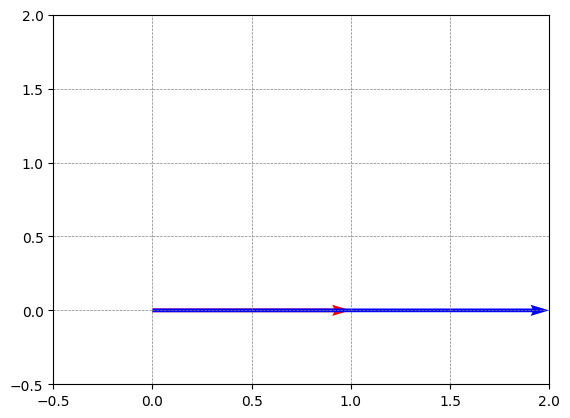

In [72]:
# Definindo os vetores
p1 = np.array([0, 0]) #Origem
v1 = np.array([1, 0]) #Direção

escalar = 2

# Multiplicação
p2 = np.multiply(p1, escalar)
v2 = np.multiply(v1, escalar)


P = [p1, p2]
V = [v1, v2]
my_color = ['r', 'b']
my_scale = [1, 1]

plot_vectors(P, V, my_color, my_scale)

## Multiplicando Vetor por outro Vetor

Interpretação: Obtemos o quanto um vetor e projetado no outro, ou seja, o quanto eles sao parecidos.

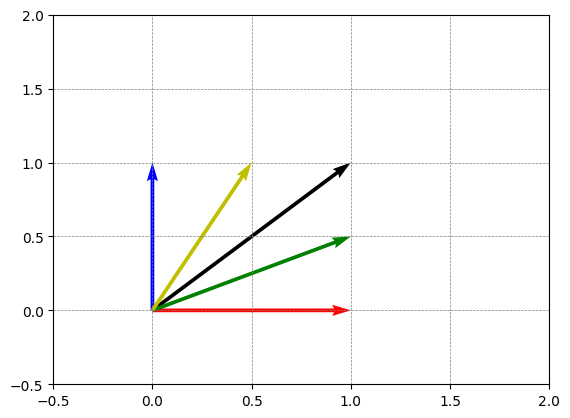

In [105]:
# Definindo os vetores
o1 = np.array([0, 0]) #Origem
d1 = np.array([1, 0]) #Direção
v1 = d1 - o1

o2 = np.array([0, 0]) #Origem
d2 = np.array([0, 1]) #Direção
v2 = d2 - o2

# Computando vetores a partir da soma (Ex. Um vetor de 0 graus + um de 90 graus resulta em um de 45 graus)
o3 = (o1 + o2) #Origem
d3 = (d1 + d2) #Direção
v3 = (d3 - o3)

o4 = (o1 + o3)/2 #Origem
d4 = (d1 + d3)/2 #Direção
v4 = (d4 - o4)

o5 = (o2 + o3)/2 #Origem
d5 = (d2 + d3)/2 #Direção
v5 = (d5 - o5)

P = [o1, o2, o3, o4, o5]
V = [d1, d2, d3, d4, d5]
my_color = ['r', 'b', 'k', 'g', 'y']
my_scale = [1, 1, 1, 1, 1]

plot_vectors(P, V, my_color, my_scale)

In [106]:
def get_angle(v1, v2):
    # Calculating the magnitude of vector v1
    mA = np.sqrt(np.power(v1, 2).sum())

    # Calculating the magnitude of vector v2
    mB = np.sqrt(np.power(v2, 2).sum())

    # Calculating the cosine of the angle between v1 and v2
    cosine_angle = np.dot(v1, v2) / (mA * mB)

    # Converting the angle from radians to degrees and printing
    angle_degrees = np.arccos(cosine_angle) * (180 / np.pi)

    return cosine_angle, angle_degrees

In [107]:
print(get_angle(v1, v1))
print(get_angle(v1, v2))
print(get_angle(v1, v3))
print(get_angle(v1, v4))
print(get_angle(v1, v5))

(1.0, 0.0)
(0.0, 90.0)
(0.7071067811865475, 45.00000000000001)
(0.8944271909999159, 26.565051177077994)
(0.4472135954999579, 63.43494882292201)


## Computando similaridades

In [151]:
import seaborn as sns
from scipy.special import softmax

### Usando a mesma ideia de Self-Attention

<Axes: >

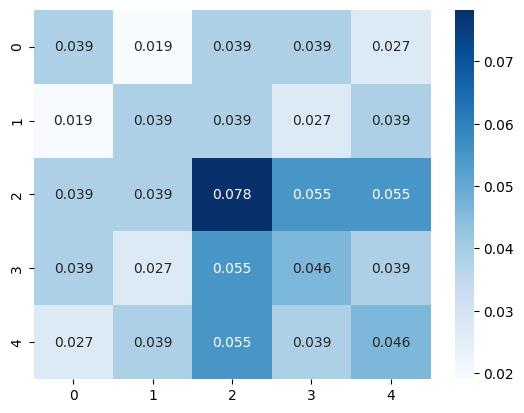

In [164]:
# Entre os vetores acima
x = np.array([v1,v2,v3,v4,v5])
mat = softmax(np.matmul(x, x.T) / np.sqrt(2)) #Divide pela raiz da dimensao do vetor
sns.heatmap(mat, annot=True, cmap="Blues")

# v1 0.0
# v2 90.0
# v3 45.0
# v4 26.5
# v5 63.4

<Axes: >

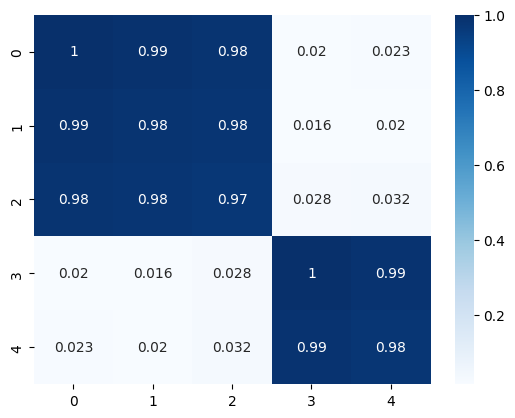

In [173]:
# Entre cores RGB
x = np.array([[255, 2, 4],
              [253, 5, 3],
              [251, 7, 6],
              [1, 4, 255],
              [2, 5, 252]])
mat = np.matmul(x, x.T)
mat = mat/np.max(mat)
sns.heatmap(mat, annot=True, cmap="Blues")

### Usando pairwise-distances

In [154]:
from sklearn.metrics.pairwise import pairwise_distances

<Axes: >

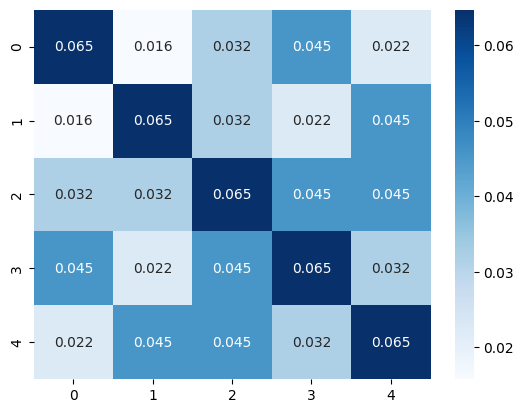

In [176]:
# Entre os vetores acima
x = np.array([v1,v2,v3,v4,v5])
sim = 1 - pairwise_distances(x, x, metric='manhattan') #Similarity
mat = softmax(sim / np.sqrt(2))
sns.heatmap(mat, annot=True, cmap="Blues")

# v1 0.0
# v2 90.0
# v3 45.0
# v4 26.5
# v5 63.4

<Axes: >

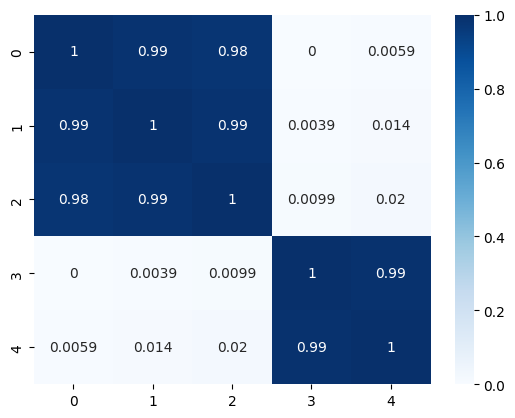

In [181]:
# Entre cores RGB
x = np.array([[255, 2, 4],
              [253, 5, 3],
              [251, 7, 6],
              [1, 4, 255],
              [2, 5, 252]])
sim = 1 - pairwise_distances(x, x, metric='manhattan') #Similarity
mat = (sim-np.min(sim))/(np.max(sim)-np.min(sim))
sns.heatmap(mat, annot=True, cmap="Blues")